# Figures for the SAIL CMAC2.0 Technical Document

In [14]:
import os
import glob
import time
import numpy as np
import xarray as xr
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib import ticker

import pyart

In [2]:
def _generate_title(radar, ds, field, sweep):
    """ Generates a title for each plot. """
    time_str = ds['time'].data[0]
    fixed_angle = radar.fixed_angle['data'][sweep]
    line_one = "%.1f Deg. %s " % (fixed_angle, time_str)
    field_name = str(field)
    field_name = field_name.replace('_', ' ')
    field_name = field_name[0].upper() + field_name[1:]
    return line_one + '\n' + field_name

### Processing Keywords

In [3]:
# Directory where the data are located
DATA_DIR = '/Users/jrobrien/ARM/data/CSU-XPrecipRadar/cmac2/'
# Desired Case for the following figures
CASE_FILE = 'gucxprecipradarcmacM1.c1.20220314-024759.nc'

In [4]:
# Easier to check variable names with xarray
ds = xr.open_dataset(DATA_DIR + CASE_FILE)

In [5]:
ds

<xarray.Dataset>
Dimensions:                                   (time: 9016, range: 668, sweep: 8)
Coordinates:
  * time                                      (time) datetime64[ns] 2022-03-1...
  * range                                     (range) float32 306.9 ... 4.029...
    azimuth                                   (time) float32 ...
    elevation                                 (time) float32 ...
Dimensions without coordinates: sweep
Data variables: (12/46)
    DBZ                                       (time, range) float64 ...
    VEL                                       (time, range) float64 ...
    WIDTH                                     (time, range) float64 ...
    ZDR                                       (time, range) float64 ...
    PHIDP                                     (time, range) float64 ...
    RHOHV                                     (time, range) float64 ...
    ...                                        ...
    longitude                                 float64 ...
    altitude                                  float64 ...
    time_coverage_start                       |S192 ...
    time_coverage_end                         |S192 ...
    time_reference                            |S192 ...
    volume_number                             int32 ...
Attributes: (12/24)
    Conventions:           CF/Radial instrument_parameters ARM-1.3
    site_id:               guc
    facility_id:           C1
    comment:               This is highly experimental and initial data. Ther...
    attributions:          This data is collected by the ARM Climate Research...
    process_version:       CMAC 2.0
    ...                    ...
    datastream:            nsaxsaprcmacppiC1.c1
    location_description:  North Slope of Alaska (NSA), Barrow, Alaska
    doi:                   10.5439/1781398
    command_line:           cmac_sail.py 202203
    field_names:           DBZ, VEL, WIDTH, ZDR, PHIDP, RHOHV, NCP, DBZhv, cb...
    history:               created by rjackson on cirrus127.ccs.ornl.gov at 2...

In [6]:
# define the radar object
radar = pyart.io.read(DATA_DIR + CASE_FILE)

In [7]:
pd.to_datetime(radar.time['data'][0])

Timestamp('1970-01-01 00:00:01.647226079')

### Figure 3: Radial Velocity Texture - 14 March 2022 case

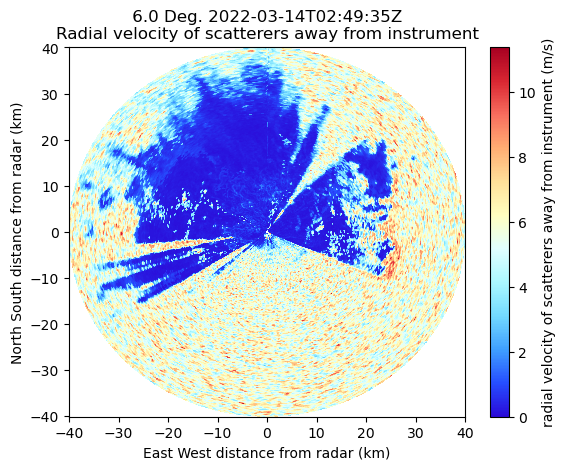

In [8]:
fig, axs = plt.subplots(1, 1)

display = pyart.graph.RadarDisplay(radar)
display.plot('velocity_texture', sweep=3, vmin=0, cmap='pyart_BuDRd12')

# save the figure
plt.savefig('xprecipradar_cmac2_velocity_texture.png')

### Figure 5: Gate ID - 14 March 2022 case

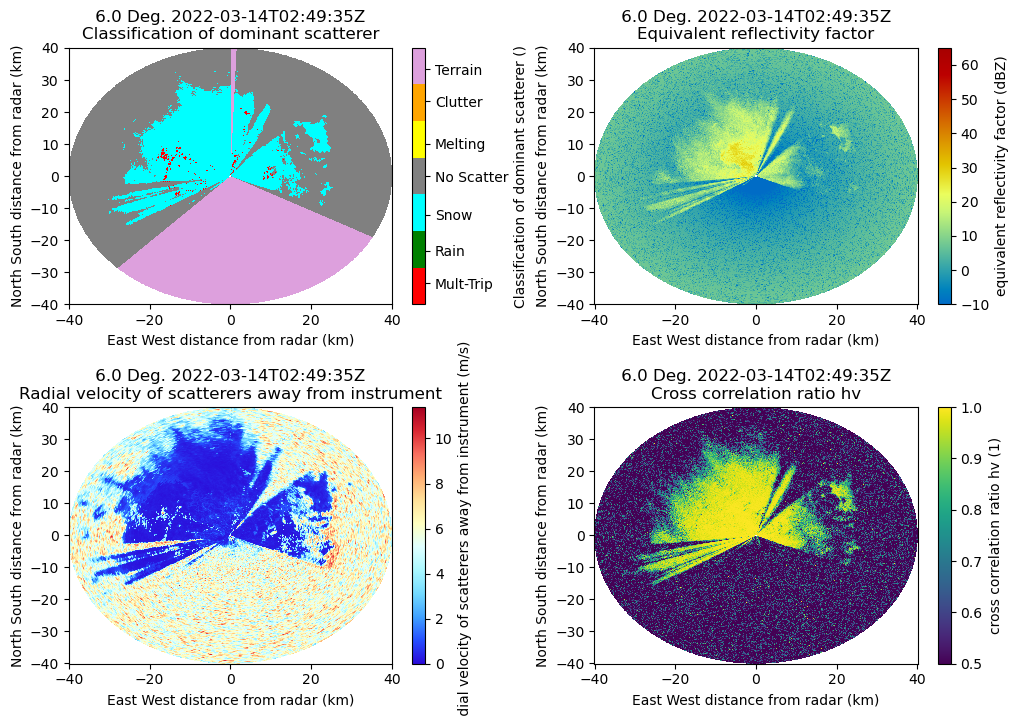

In [9]:
fig, axs = plt.subplots(2, 2, figsize=[12, 8])
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# Gate ID
ncmap = colors.ListedColormap(["red", "green", "aqua", "gray", "yellow", "orange", "plum"])
labels = ["Mult-Trip", "Rain", "Snow", "No Scatter", "Melting", "Clutter", "Terrain"]
nticks = [0.5, 1.25, 2.1, 3.0, 3.75, 4.75, 5.5]
display.plot('gate_id', sweep=3, cmap=ncmap, ax=axs[0, 0], ticklabs=labels[:], ticks=np.array(nticks))

# Equvialent Radar Reflectivity Factor
display.plot('DBZ', sweep=3, cmap='pyart_HomeyerRainbow', ax=axs[0, 1])

# Radial Velocity
display.plot('velocity_texture', sweep=3, vmin=0, cmap='pyart_BuDRd12', ax=axs[1, 0])

# Correlation Coefficient
display.plot('RHOHV', sweep=3, ax=axs[1, 1], vmin=0.5, vmax=1.0)

# Save the fig
plt.savefig('xprecipradar_cmac2_multipanel.png')

### Figure 6: Raw and De-aliased Radial Velocities 

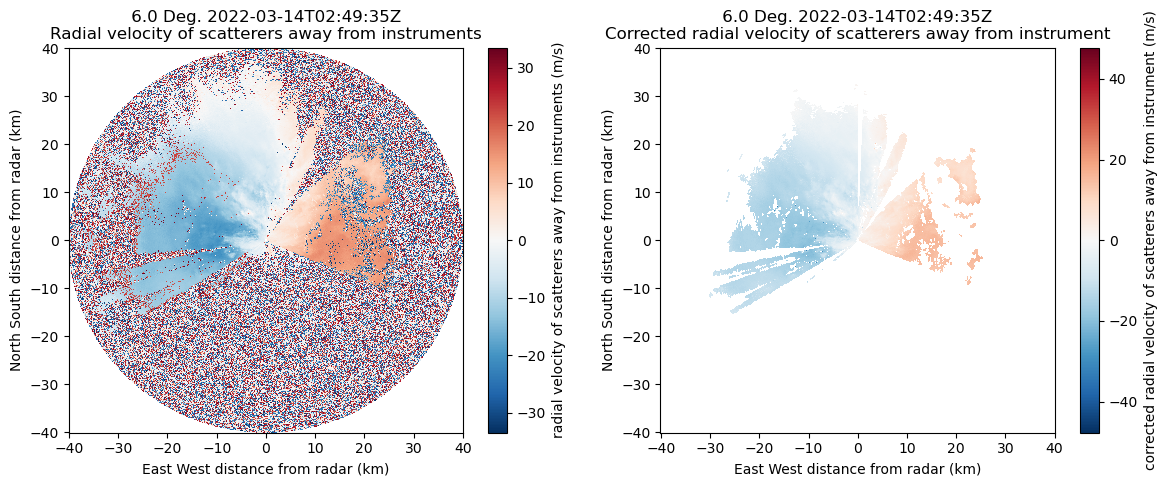

In [10]:
fig2, ax2 = plt.subplots(1, 2, figsize=[14, 5])
plt.subplots_adjust(wspace=0.2)

# Raw radial velocities
display.plot('VEL', sweep=3, ax=ax2[0], cmap='RdBu_r')

# Dealiased Radial Velocities
display.plot('corrected_velocity', sweep=3, ax=ax2[1], cmap='RdBu_r')

# save the figure
plt.savefig('xprecipradar_cmac2_velocities.png')

### Figure 7: LP Technique

### Figure 8: Uncorrected and Corrected Reflectivity

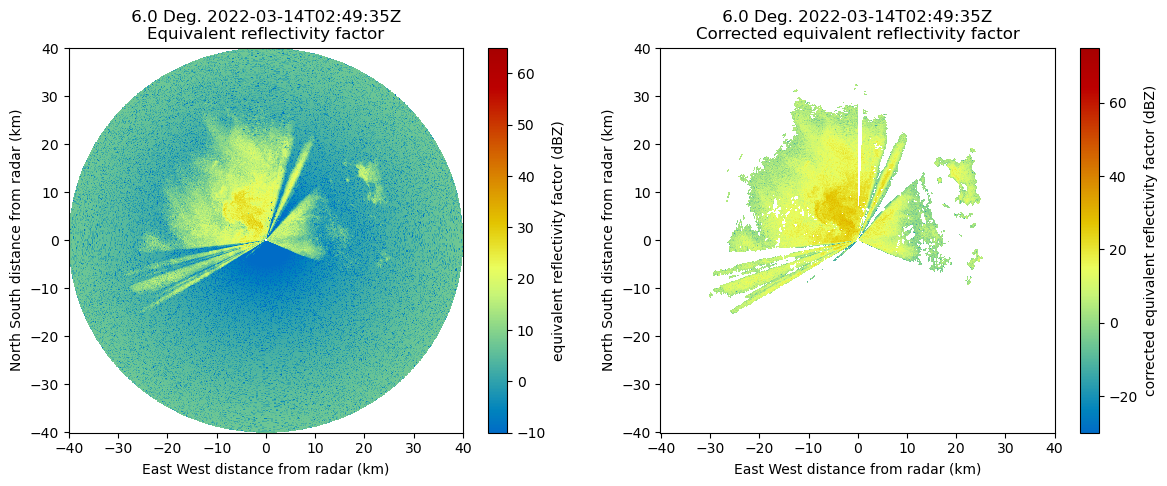

In [11]:
fig3, ax3 = plt.subplots(1, 2, figsize=[14, 5])

plt.subplots_adjust(wspace=0.2)

# Raw radial velocities
display.plot('DBZ', sweep=3, ax=ax3[0], cmap='pyart_HomeyerRainbow')

# Dealiased Radial Velocities
display.plot('corrected_reflectivity', sweep=3, ax=ax3[1], cmap='pyart_HomeyerRainbow')

# save the figure
plt.savefig('xprecipradar_cmac2_reflectivity.png')

### Figure 9: Uncorrected and Corrected Differential Reflectivity

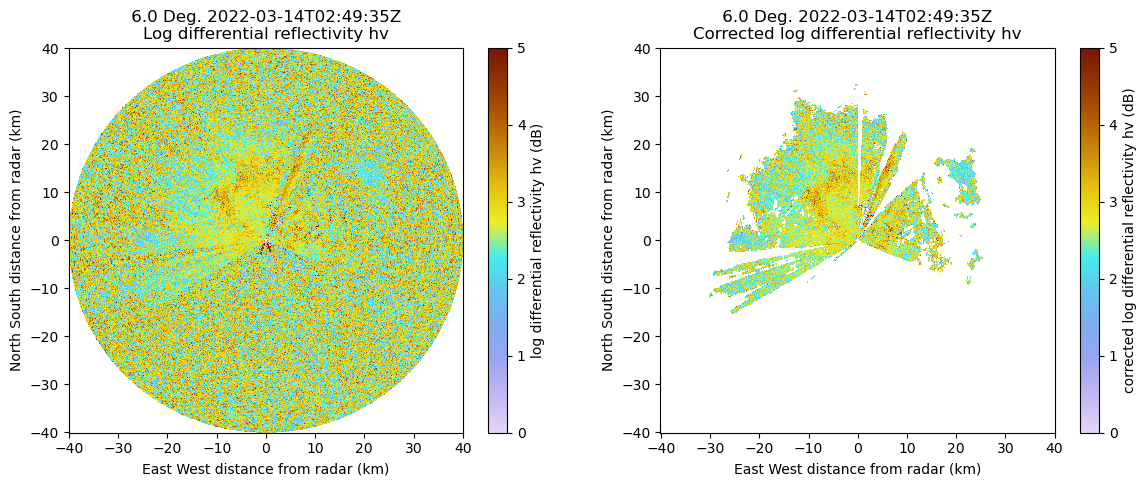

In [12]:
fig4, ax4 = plt.subplots(1, 2, figsize=[14, 5])
plt.subplots_adjust(wspace=0.2)

# Raw radial velocities
display.plot('ZDR', sweep=3, ax=ax4[0], vmin=0, vmax=5, cmap='pyart_LangRainbow12')

# Dealiased Radial Velocities
display.plot('corrected_differential_reflectivity', vmin=0, vmax=5, sweep=3, ax=ax4[1], cmap='pyart_LangRainbow12')

# save the figure
plt.savefig('xprecipradar_cmac2_diff_reflectivity.png')

### Figure 10: Estimated Snowfall Rates

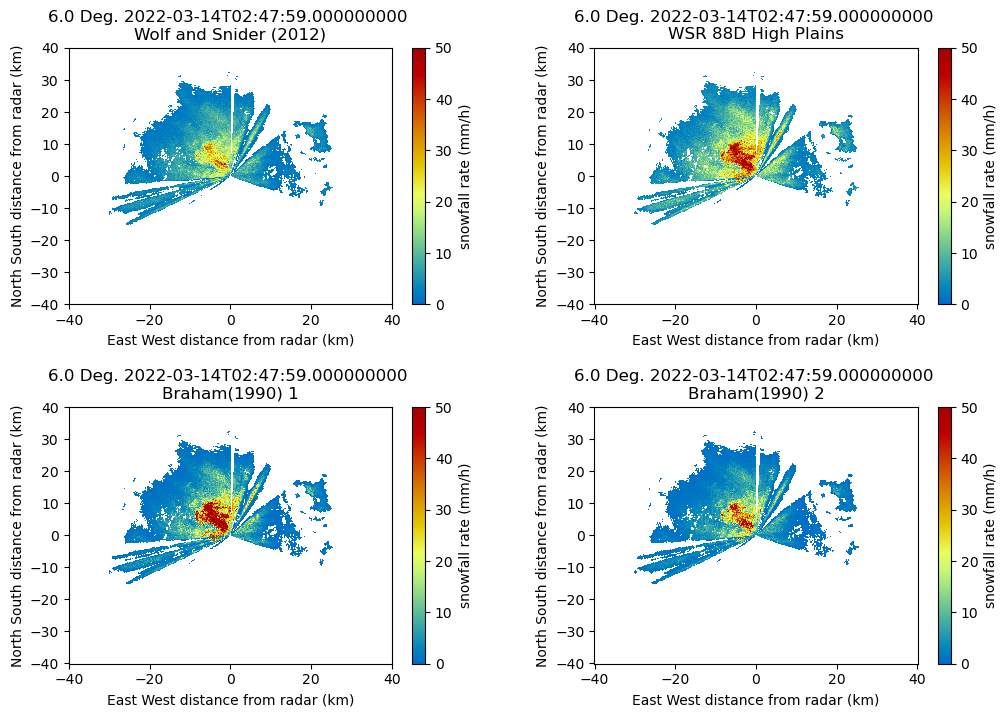

In [13]:
fig4, axC = plt.subplots(2, 2, figsize=[12, 8])
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# Gate ID
px1 = display.plot('snow_rate_ws2012', sweep=3, vmin=0, 
                   vmax=50, cmap='pyart_HomeyerRainbow', 
                   ax=axC[0, 0], title=_generate_title(radar, ds, 'Wolf and Snider (2012)', sweep=3))

# Equvialent Radar Reflectivity Factor
display.plot('snow_rate_ws88diw', sweep=3, vmin=0, 
             vmax=50, cmap='pyart_HomeyerRainbow', 
             ax=axC[0, 1], title=_generate_title(radar, ds, 'WSR 88D High Plains', sweep=3))

# Radial Velocity
display.plot('snow_rate_m2009_1', sweep=3, vmin=0, 
             vmax=50, cmap='pyart_HomeyerRainbow', ax=axC[1, 0],
             title=_generate_title(radar, ds, 'Braham(1990) 1', sweep=3))

# Correlation Coefficient
display.plot('snow_rate_m2009_2', sweep=3, cmap='pyart_HomeyerRainbow', 
             ax=axC[1, 1], vmin=0, vmax=50, title=_generate_title(radar, ds, 'Braham(1990) 2', sweep=3))

# save the figure
plt.savefig('xprecipradar_cmac2_snowfall.png')
